# Predicting if a person would buy life insurnace based on his age using logistic regression


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel('project3_data (1).xlsx')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.size

4242

In [7]:
df.shape

(303, 14)

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [22]:
df['target'].unique()

array([1, 0], dtype=int64)

In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


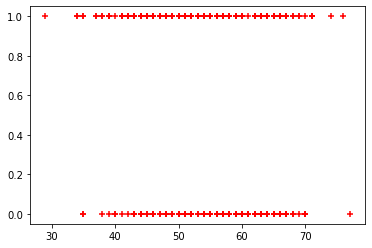

In [48]:
plt.scatter(df.age,df.target,marker='+',color='red')

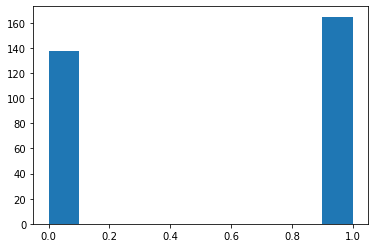

In [30]:
plt.hist(df.target)
plt.show()

# Splitting the data

In [49]:
from sklearn.model_selection import train_test_split

In [51]:
X = df[['age']]
X[:3]

,age
0,63
1,37
2,41


In [53]:
y = df['target']
y[:3]

0    1
1    1
2    1
Name: target, dtype: int64

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [56]:
X_train[:3]

,age
221,55
244,56
99,53


In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
model = LogisticRegression()
model

LogisticRegression()

In [59]:
model.fit(X_train,y_train)

LogisticRegression()

In [61]:
model.coef_

array([[-0.06061286]])

In [62]:
model.intercept_

array([3.46140877])

In [63]:
X_test[:3]

,age
113,43
249,69
18,43


In [64]:
y_pred = model.predict(X_test)

In [65]:
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0], dtype=int64)

In [66]:
model.score(X_train,y_train)*100

62.735849056603776

In [67]:
model.score(X_test,y_test)*100

60.43956043956044

In [69]:
model.score(X_test,y_pred)*100

100.0

In [76]:
from sklearn import metrics

In [77]:
metrics.accuracy_score(y_test,y_pred)*100

60.43956043956044

In [78]:
metrics.precision_score(y_test,y_pred)*100

64.40677966101694

In [79]:
metrics.recall_score(y_test,y_pred)*100

71.69811320754717

In [80]:
metrics.confusion_matrix(y_test,y_pred)*100

array([[1700, 2100],
       [1500, 3800]], dtype=int64)

In [81]:
metrics.mean_squared_error(y_test,y_pred)*100

39.56043956043956

In [73]:
myT = [[41],[23],[56]]
model.predict(myT)

array([1, 1, 1], dtype=int64)

In [74]:
model.predict_proba([[16]])

array([[0.07644894, 0.92355106]])